In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### NEWTON’S DIVIDED-DIFFERENCE INTERPOLATING POLYNOMIALS 

In [72]:
def newton_interpolation(x, y, xi):
    #length/number of datapoints
    n = len(x)
    #divided difference initialization
    fdd = [[None for x in range(n)] for x in range(n)]
    #f(X) values at different degrees
    yint = [None for x in range(n)]
    #error value
    ea = [None for x in range(n)]
    
    #finding divided difference
    for i in range(n):
        fdd[i][0] = y[i]
    for j in range(1,n):
        for i in range(n-j):
            fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])
    
    #just printing dd here
    fdd_table = pd.DataFrame(fdd)
#     print(fdd_table)
    
    #interpolating xi
    xterm = 1
    yint[0] = fdd[0][0]
    for order in range(1, n):
        xterm = xterm * (xi - x[order-1])
        yint2 = yint[order-1] + fdd[0][order]*xterm
        ea[order-1] = yint2 - yint[order-1]
        yint[order] = yint2
    
    #returning a map for pandas dataframe
    return map(lambda yy, ee : [yy, ee], yint, ea)

In [73]:
x = [1,4,6, 5, 3, 1.5, 2.5, 3.5]
y = [0, 1.3862944, 1.7917595, 1.6094379, 1.0986123 , 0.4054641, 0.9162907, 1.2527630]
xi = 2

a = newton_interpolation(x, y, xi)
df = pd.DataFrame(a, columns=['f(x)','error'])
df

,f(x),error
0,0.000000,0.462098
1,0.462098,0.103746
2,0.565844,0.062924
3,0.628769,0.046953
4,0.675722,0.021791
5,0.697513,-0.003616
6,0.693897,-0.000459
7,0.693438,NaN


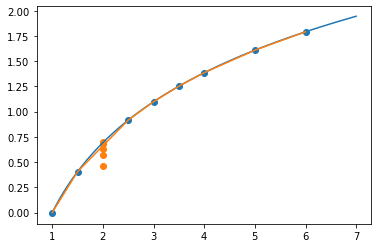

In [39]:
sorted_order = np.argsort(x)
xs = np.array(x)[sorted_order]
ys = np.array(y)[sorted_order]
plt.scatter(x,y) #datapoints
xo= np.linspace(1,7,1000)
plt.plot(xo, np.log(xo), label="f(x)=lnx")
plt.plot(xs,ys)

#scatter plot for values of x in different orders 
vals = np.array(df['f(x)'])[1:]
k = [2 for x in range(7)]
plt.scatter(k, vals)

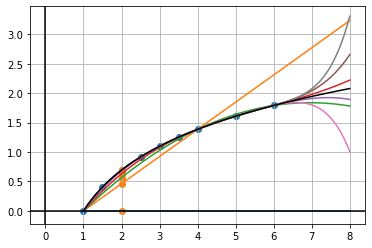

In [40]:
#for graph comparison purposes

def divided_difference(x, y):
    #length/number of datapoints
    n = len(x)
    #divided difference initialization
    fdd = [[None for x in range(n)] for x in range(n)]
    
    #finding divided difference
    for i in range(n):
        fdd[i][0] = y[i]
    for j in range(1,n):
        for i in range(n-j):
            fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])
    
    return fdd

#polynomial at len(datapoints) order
def newton_polynomial(fdd, xi):
    n = len(fdd)
    #f(X) values at different degrees
    yint = [None for x in range(n)]
    #error value
    ea = [None for x in range(n)]
    
    #interpolating xi
    xterm = 1
    yint[0] = fdd[0][0]
    for order in range(1, n):
        xterm = xterm * (xi - x[order-1])
        yint2 = yint[order-1] + fdd[0][order]*xterm
        ea[order-1] = yint2 - yint[order-1]
        yint[order] = yint2
    
    return yint

x = [1,4,6, 5, 3, 1.5, 2.5, 3.5]
y = [0, 1.3862944, 1.7917595, 1.6094379, 1.0986123 , 0.4054641, 0.9162907, 1.2527630]
xi = 2
dd = divided_difference(x,y)
pd.DataFrame(dd)

#newton polynomial interpolation at varying orders
xxxx = np.linspace(1, 8, 200)
yyyy = []
for i in xxxx:
    yyyy.append(newton_polynomial(dd, i))
plt.plot(xxxx, yyyy)

#actual function
xo= np.linspace(1,8,200)
plt.plot(xo, np.log(xo), label="f(x)=lnx", color="black")

#datapoints scatter plot
plt.scatter(x,y) 

#scatter plot for values of x in different orders 
vals = np.array(df['f(x)'])
k = [2 for x in range(len(vals))]
plt.scatter(k, vals)

plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')

### LAGRANGE INTERPOLATING POLYNOMIALS

In [46]:
def lagrange_interpolation(x,y,xx):
    n = len(x)
    sum = 0
    for i in range(n):
        product = y[i]
        for j in range(n):
            if i != j:
                product = product*(xx - x[j])/(x[i]-x[j])
        sum = sum + product
    return sum

# x = [1, 3, 5, 7, 13]
# y = [800, 2310, 3090, 3940, 4755]
# x = [1, 4, 6]
# y = [0, 1.386294, 1.791760]
x = [1,4,6, 5, 3, 1.5, 2.5, 3.5]
y = [0, 1.3862944, 1.7917595, 1.6094379, 1.0986123 , 0.4054641, 0.9162907, 1.2527630]
lagrange_interpolation(x,y, 2)

0.6934383504761912

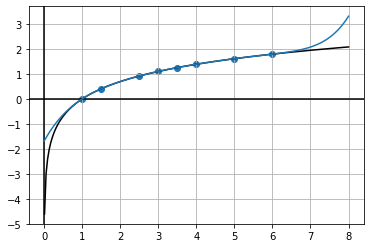

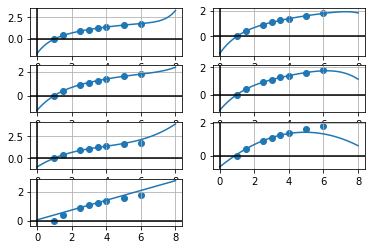

In [53]:
plt.scatter(x,y)
xx = np.linspace(0, 8, 100)
yy = [lagrange_interpolation(x,y,i) for i in xx]

xo= np.linspace(0.01,8,200)
plt.plot(xo, np.log(xo), label="f(x)=lnx", color="black")

plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.plot(xx,yy)

fig = plt.figure()

for i in range(1,len(x)):
    g1 = fig.add_subplot(len(x)/2,2,i)
    g1.plot(xx, lagrange_interpolation(x[i-1:],y[i-1:],xx))
    g1.scatter(x,y)
    plt.grid(True, which='both')
    plt.axvline(x=0, color='k')
    plt.axhline(y=0, color='k')
    